# **LOGISTIC REGRESSION**

Overview
*   This lab assignment focuses on implementing Logistic Regression to predict loan defaults using the Loan Default Prediction Dataset.
*   You will develop models perform **Logistic Regression** on Loan Default Prediction Dataset datasets using **Gradient Descent** method to identify high-risk individuals, allowing for timely interventions in financial loan services.


# **DATASET**


1.  **Source:** Loan Default Prediction [Dataset](https://www.kaggle.com/datasets/nikhil1e9/loan-default)
2.   **Size:** 255,347 rows and 18 columns

**Purpose:** Predict the likelihood of loan default




**TASK 1**:



1. Preprocess the data








In [1]:
#importing the necessary libraries 
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Loan.csv")
df.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   
3      Full-time       Married          No            No    Business   
4     Unemployed      Divorced          No           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1  
3          No        0  
4          No        0

In [5]:
df1 = df.drop(['LoanID'], axis = 'columns')
df1.head(2)

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   

   InterestRate  LoanTerm  DTIRatio   Education EmploymentType MaritalStatus  \
0         15.23        36      0.44  Bachelor's      Full-time      Divorced   
1          4.81        60      0.68    Master's      Full-time       Married   

  HasMortgage HasDependents LoanPurpose HasCoSigner  Default  
0         Yes           Yes       Other         Yes        0  
1          No            No       Other         Yes        0

In [7]:
df2 = df1.drop(['LoanPurpose'], axis = 'columns')
df2.head(2)

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   

   InterestRate  LoanTerm  DTIRatio   Education EmploymentType MaritalStatus  \
0         15.23        36      0.44  Bachelor's      Full-time      Divorced   
1          4.81        60      0.68    Master's      Full-time       Married   

  HasMortgage HasDependents HasCoSigner  Default  
0         Yes           Yes         Yes        0  
1          No            No         Yes        0

In [15]:
df2.shape

(255347, 16)

In [17]:
# creating dummies for Education, Employment Type, Marital Status, HasMortgage, HasDependents, HasCoSigner
dummies = pd.get_dummies(df2[['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'HasCoSigner']], drop_first = True)
df3 = pd.concat([df2, dummies], axis=1)

In [19]:
df3.head(2)

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   

   InterestRate  LoanTerm  DTIRatio   Education  ... Education_Master's  \
0         15.23        36      0.44  Bachelor's  ...              False   
1          4.81        60      0.68    Master's  ...               True   

  Education_PhD EmploymentType_Part-time EmploymentType_Self-employed  \
0         False                    False                        False   
1         False                    False                        False   

  EmploymentType_Unemployed  MaritalStatus_Married  MaritalStatus_Single  \
0                     False                  False                 False   
1                     False                   True                 False   

   HasMortgage_Yes  HasDependents_Yes  HasCoSigner_Yes  
0             True               True             True  
1            False              False             True  

[2 rows x 27 columns]

In [23]:
df4 = df3.drop(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'HasCoSigner'], axis = 'columns')
df4.shape

(255347, 21)

In [25]:
df4.head(2)

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   

   InterestRate  LoanTerm  DTIRatio  Default  ...  Education_Master's  \
0         15.23        36      0.44        0  ...               False   
1          4.81        60      0.68        0  ...                True   

   Education_PhD  EmploymentType_Part-time  EmploymentType_Self-employed  \
0          False                     False                         False   
1          False                     False                         False   

   EmploymentType_Unemployed  MaritalStatus_Married  MaritalStatus_Single  \
0                      False                  False                 False   
1                      False                   True                 False   

   HasMortgage_Yes  HasDependents_Yes  HasCoSigner_Yes  
0             True               True             True  
1            False              False             True  

[2 rows x 21 columns]

In [27]:
df5 = df4.astype(int)
df5.head(2)

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   

   InterestRate  LoanTerm  DTIRatio  Default  ...  Education_Master's  \
0            15        36         0        0  ...                   0   
1             4        60         0        0  ...                   1   

   Education_PhD  EmploymentType_Part-time  EmploymentType_Self-employed  \
0              0                         0                             0   
1              0                         0                             0   

   EmploymentType_Unemployed  MaritalStatus_Married  MaritalStatus_Single  \
0                          0                      0                     0   
1                          0                      1                     0   

   HasMortgage_Yes  HasDependents_Yes  HasCoSigner_Yes  
0                1                  1                1  
1                0                  0                1  

[2 rows x 21 columns]

In [29]:
df5.skew()

Age                             0.000698
Income                         -0.000381
LoanAmount                     -0.001827
CreditScore                     0.004688
MonthsEmployed                 -0.002142
NumCreditLines                 -0.000278
InterestRate                    0.004803
LoanTerm                       -0.002178
DTIRatio                        0.000000
Default                         2.396377
Education_High School           1.153110
Education_Master's              1.161857
Education_PhD                   1.161954
EmploymentType_Part-time        1.146907
EmploymentType_Self-employed    1.157864
EmploymentType_Unemployed       1.155015
MaritalStatus_Married           0.703631
MaritalStatus_Single            0.709050
HasMortgage_Yes                -0.000055
HasDependents_Yes              -0.001073
HasCoSigner_Yes                -0.000431
dtype: float64

In [31]:
pd.set_option('display.max_columns', None)
df5.head(3)

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   

   InterestRate  LoanTerm  DTIRatio  Default  Education_High School  \
0            15        36         0        0                      0   
1             4        60         0        0                      0   
2            21        24         0        1                      0   

   Education_Master's  Education_PhD  EmploymentType_Part-time  \
0                   0              0                         0   
1                   1              0                         0   
2                   1              0                         0   

   EmploymentType_Self-employed  EmploymentType_Unemployed  \
0                             0                          0   
1                             0                          0   
2                             0                          1   

   MaritalStatus_Married  MaritalStatus_Single  HasMortgage_Yes  \
0                      0                     0                1   
1                      1                     0                0   
2                      0                     0                1   

   HasDependents_Yes  HasCoSigner_Yes  
0                  1                1  
1                  0                1  
2                  1                0

In [33]:
df5.describe()

Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  DTIRatio  \
count   255347.000000   255347.000000  255347.000000  255347.000000  255347.0   
mean        59.541976        2.501036      12.997043      36.025894       0.0   
std         34.643376        1.117018       6.630450      16.969330       0.0   
min          0.000000        1.000000       2.000000      12.000000       0.0   
25%         30.000000        2.000000       7.000000      24.000000       0.0   
50%         60.000000        2.000000      13.000000      36.000000       0.0   
75%         90.000000        3.000000      19.000000      48.000000       0.0   
max        119.000000        4.000000      25.000000      60.000000       0.0   

             Default  Education_High School  Education_Master's  \
count  255347.000000          255347.000000       255347.000000   
mean        0.116128               0.250259            0.248842   
std         0.320379               0.433163            0.432343   
min         0.000000               0.000000            0.000000   
25%         0.000000               0.000000            0.000000   
50%         0.000000               0.000000            0.000000   
75%         0.000000               1.000000            0.000000   
max         1.000000               1.000000            1.000000   

       Education_PhD  EmploymentType_Part-time  EmploymentType_Self-employed  \
count  255347.000000             255347.000000                 255347.000000   
mean        0.248826                  0.251270                      0.249488   
std         0.432334                  0.433744                      0.432718   
min         0.000000                  0.000000                      0.000000   
25%         0.000000                  0.000000                      0.000000   
50%         0.000000                  0.000000                      0.000000   
75%         0.000000                  1.000000                      0.000000   
max         1.000000                  1.000000                      1.000000   

       EmploymentType_Unemployed  MaritalStatus_Married  MaritalStatus_Single  \
count              255347.000000          255347.000000         255347.000000   
mean                    0.249950               0.334063              0.332927   
std                     0.432985               0.471663              0.471262   
min                     0.000000               0.000000              0.000000   
25%                     0.000000               0.000000              0.000000   
50%                     0.000000               0.000000              0.000000   
75%                     0.000000               1.000000              1.000000   
max                     1.000000               1.000000              1.000000   

       HasMortgage_Yes  HasDependents_Yes  HasCoSigner_Yes  
count    255347.000000      255347.000000    255347.000000  
mean          0.500014           0.500268         0.500108  
std           0.500001           0.500001         0.500001  
min           0.000000           0.000000         0.000000  
25%           0.000000           0.000000         0.000000  
50%           1.000000           1.000000         1.000000  
75%           1.000000           1.000000         1.000000  
max           1.000000           1.000000         1.000000

In [37]:
#here we can see that DTIRatio is looking useless 
df5['DTIRatio'].unique()

array([0])

In [39]:
df6 = df5.drop(['DTIRatio'], axis = 'columns')
df6.shape

(255347, 20)

In [41]:
# The columns with boolean values are skewed so nothing is to be done without it
df7 = df6
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm']
scaler = MinMaxScaler()
df7[columns_to_scale] = scaler.fit_transform(df7[columns_to_scale])

In [43]:
df7.skew()

Age                             0.000698
Income                         -0.000381
LoanAmount                     -0.001827
CreditScore                     0.004688
MonthsEmployed                 -0.002142
NumCreditLines                 -0.000278
InterestRate                    0.004803
LoanTerm                       -0.002178
Default                         2.396377
Education_High School           1.153110
Education_Master's              1.161857
Education_PhD                   1.161954
EmploymentType_Part-time        1.146907
EmploymentType_Self-employed    1.157864
EmploymentType_Unemployed       1.155015
MaritalStatus_Married           0.703631
MaritalStatus_Single            0.709050
HasMortgage_Yes                -0.000055
HasDependents_Yes              -0.001073
HasCoSigner_Yes                -0.000431
dtype: float64

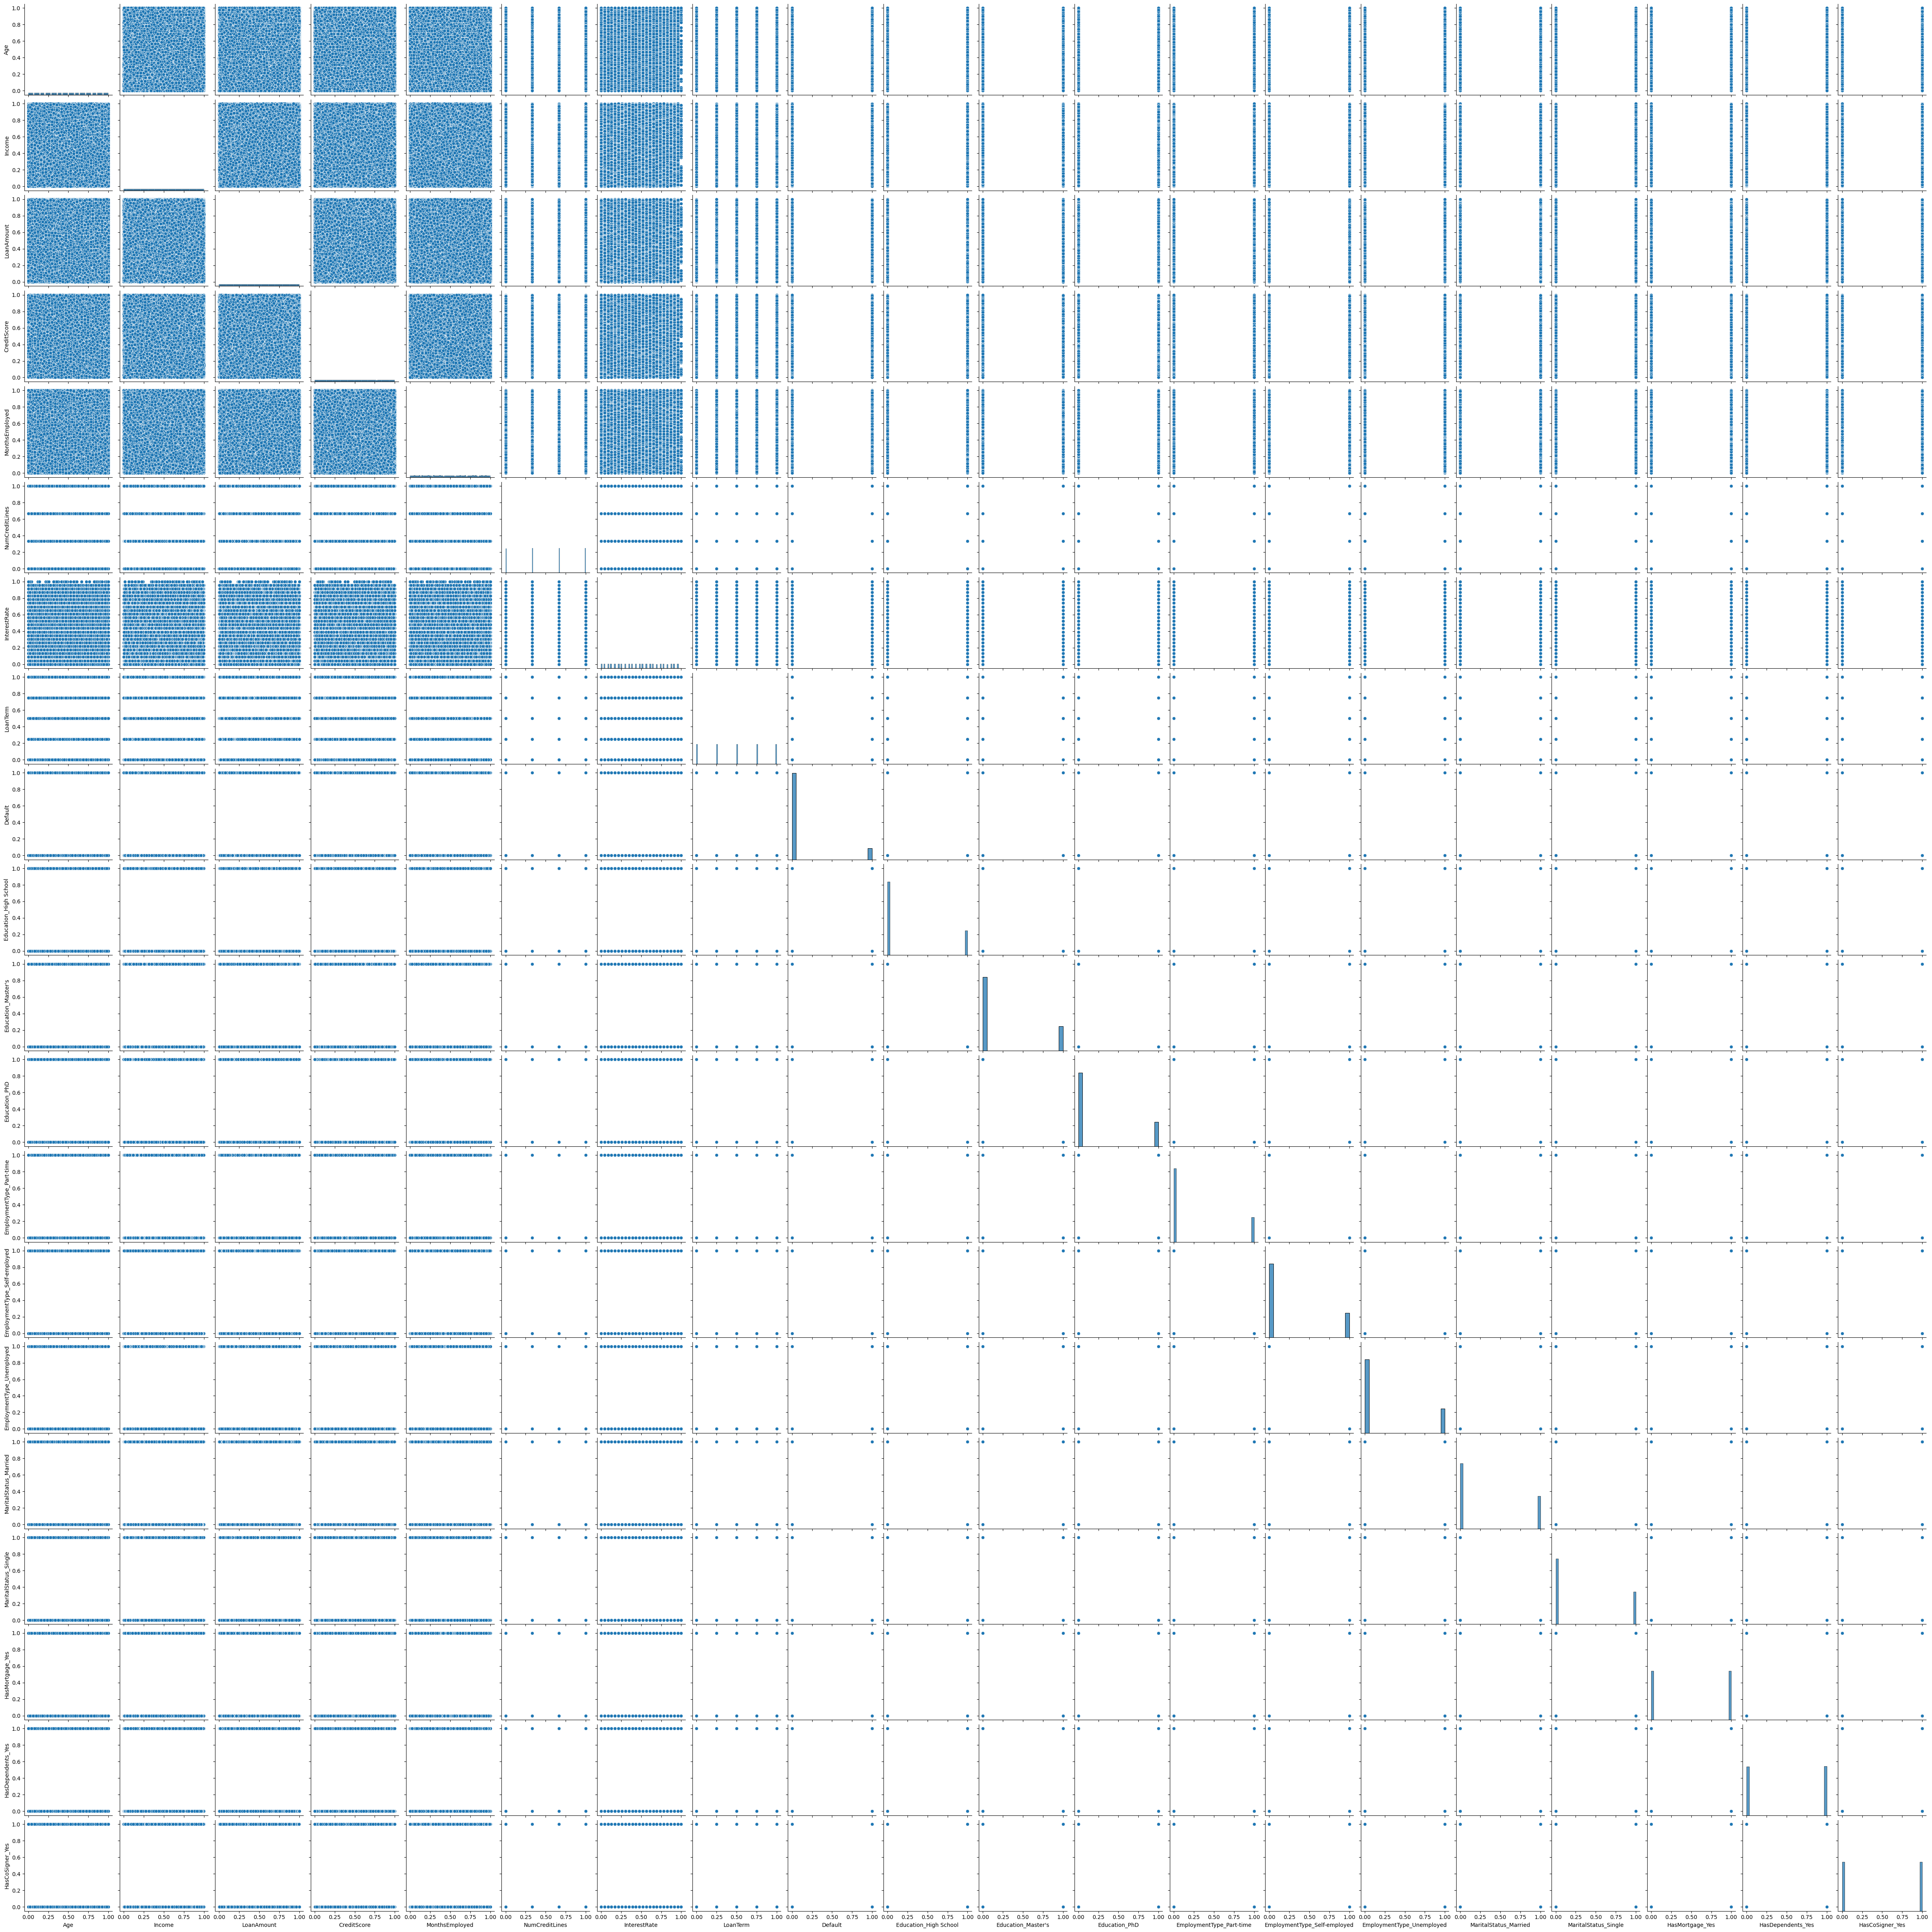

In [45]:
import seaborn as sns
sns.pairplot(df7)

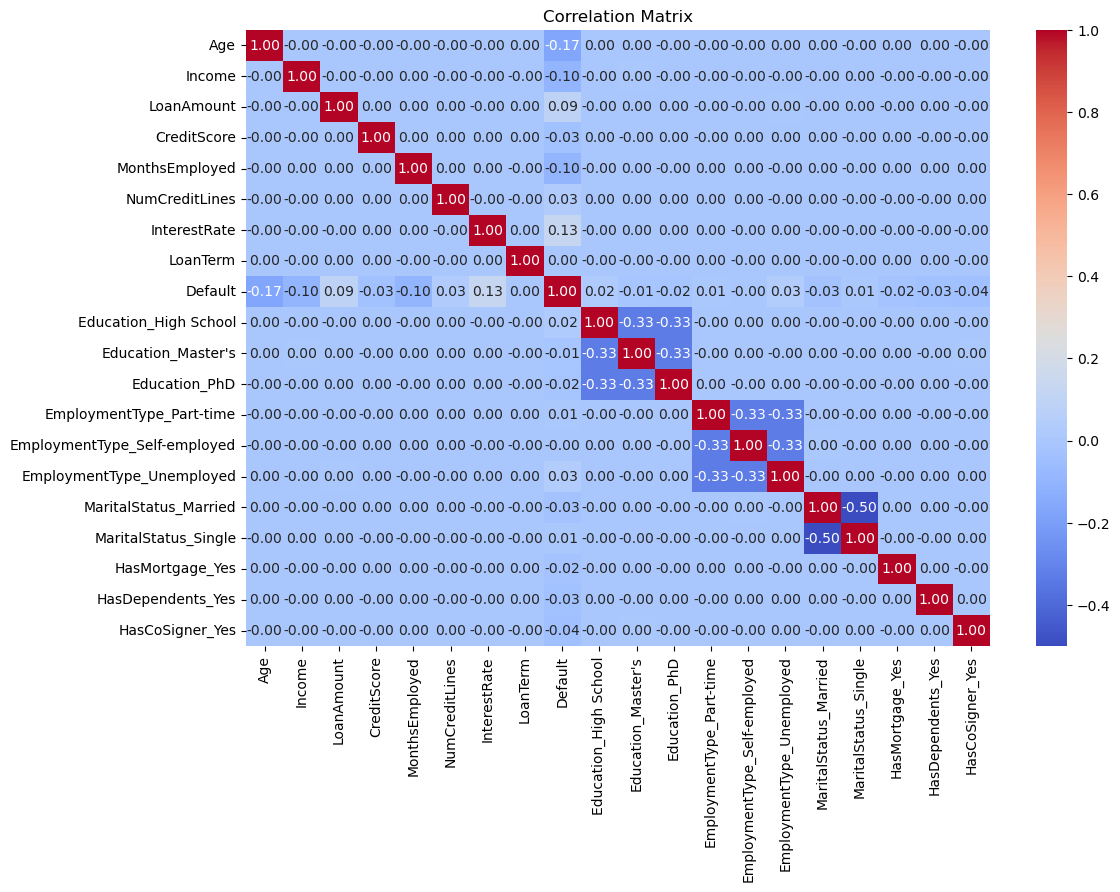

In [51]:
# checking for multicollinearity
import matplotlib.pyplot as plt
corr_matrix = df7.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# data is not that correlated, now we can move to the next task

# **TASK 2**:

# **Data Splitting:**

# **Implement the following data splitting strategies:**

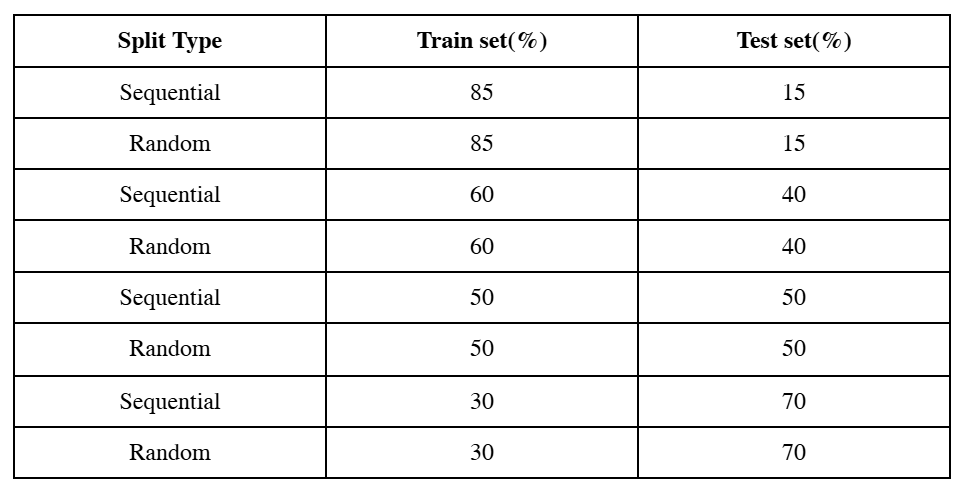

In [53]:
X = df7.drop(['Default'], axis = 'columns')

In [55]:
Y = df7['Default']
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: Default, dtype: int64

In [57]:
X.head()

Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
0  0.745098  0.525885    0.186070     0.400729        0.672269   
1  1.000000  0.262461    0.487512     0.287796        0.126050   
2  0.549020  0.512656    0.506892     0.275046        0.218487   
3  0.274510  0.123801    0.162446     0.806922        0.000000   
4  0.823529  0.040274    0.016894     0.606557        0.067227   

   NumCreditLines  InterestRate  LoanTerm  Education_High School  \
0        1.000000      0.565217      0.50                      0   
1        0.000000      0.086957      1.00                      0   
2        0.666667      0.826087      0.25                      0   
3        0.666667      0.217391      0.25                      1   
4        1.000000      0.173913      0.75                      0   

   Education_Master's  Education_PhD  EmploymentType_Part-time  \
0                   0              0                         0   
1                   1              0                         0   
2                   1              0                         0   
3                   0              0                         0   
4                   0              0                         0   

   EmploymentType_Self-employed  EmploymentType_Unemployed  \
0                             0                          0   
1                             0                          0   
2                             0                          1   
3                             0                          0   
4                             0                          1   

   MaritalStatus_Married  MaritalStatus_Single  HasMortgage_Yes  \
0                      0                     0                1   
1                      1                     0                0   
2                      0                     0                1   
3                      1                     0                0   
4                      0                     0                0   

   HasDependents_Yes  HasCoSigner_Yes  
0                  1                1  
1                  0                1  
2                  1                0  
3                  0                0  
4                  1                0

In [59]:
#now we carry out splittings 
from sklearn.model_selection import train_test_split

def sequential_split(X, y, train_size):
    split_index = int(len(X) * train_size)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    return X_train, X_test, y_train, y_test
    
def random_split(X, y, train_size):
    return train_test_split(X, y, train_size=train_size, random_state=42)

ratio = [0.85, 0.60, 0.50, 0.30]
X_train_seq_85, X_test_seq_85, y_train_seq_85, y_test_seq_85 = sequential_split(X, Y, 0.85)
X_train_rand_85, X_test_rand_85, y_train_rand_85, y_test_rand_85 = random_split(X, Y, 0.85) 

X_train_seq_60, X_test_seq_60, y_train_seq_60, y_test_seq_60 = sequential_split(X, Y, 0.60)
X_train_rand_60, X_test_rand_60, y_train_rand_60, y_test_rand_60 = random_split(X, Y, 0.60) 

X_train_seq_50, X_test_seq_50, y_train_seq_50, y_test_seq_50 = sequential_split(X, Y, 0.50)
X_train_rand_50, X_test_rand_50, y_train_rand_50, y_test_rand_50 = random_split(X, Y, 0.50)

X_train_seq_30, X_test_seq_30, y_train_seq_30, y_test_seq_30 = sequential_split(X, Y, 0.30)
X_train_rand_30, X_test_rand_30, y_train_rand_30, y_test_rand_30 = random_split(X, Y, 0.30)

# **TASK 3**
# Gradient Descent Implementations

Implement using: Implement three variants of Gradient Descent:

• SGD (Stochastic Gradient Descent)

•	GD (Gradient Descent)

•	BGD (Batch Gradient Descent)

Important Notes:
1.  Implement the update rules manually without using built-in functions
2.  Experiment with different learning rates and epochs
1.   Analyze the impact of these hyperparameters on model performance


# STOCHASTIC GRADIENT DESCENT

In [87]:
class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def loss(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def fit(self, X, y):
        samples, features = X.shape
        self.weights = np.zeros(features)
        self.bias = 0
        
        for epoch in range(self.epochs):
            for i in range(samples):
                xi = X.iloc[i]
                yi = y.iloc[i]

                
                # Linear model
                linear_output = np.dot(xi, self.weights) + self.bias
                y_pred = self.sigmoid(linear_output)
                
                # Gradients
                dw = (y_pred - yi) * xi
                db = (y_pred - yi)
                
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
                
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_output)
        return np.where(y_pred >= 0.5, 1, 0)


# GRADIENT DESCENT

In [83]:
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def loss(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def fit(self, X, y):
        samples, features = X.shape
        self.weights = np.zeros(features)
        self.bias = 0
        for epoch in range(self.epochs):
            for i in range(samples):
                xi = X.iloc[i]
                yi = y.iloc[i]

                
                linear_output = np.dot(xi, self.weights) + self.bias
                y_pred = self.sigmoid(linear_output)
                
                dw = (y_pred - yi) * xi
                db = (y_pred - yi)
                
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
            
            y_preds = self.sigmoid(np.dot(X, self.weights) + self.bias)
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_output)
        return np.where(y_pred >= 0.5, 1, 0)

# BATCH GRADIENT DESCENT 

In [85]:
class LogisticRegressionBGD:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def loss(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def fit(self, X, y):
        samples, features = X.shape
        self.weights = np.zeros(features)
        self.bias = 0
        for epoch in range(self.epochs):
            linear_output = np.dot(X, self.weights) + self.bias
            y_preds = self.sigmoid(linear_output)
            
            dw = np.dot(X.T, (y_preds - y)) / samples
            db = np.sum(y_preds - y) / samples
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_output)
        return np.where(y_pred >= 0.5, 1, 0)


# TESTING

In [104]:
models = {
    'SGD': LogisticRegressionSGD,
    'GD': LogisticRegressionGD,
    'BGD': LogisticRegressionBGD
}
learning_rates = [0.005, 0.01]
epochs_list = [5, 10, 12]


In [ ]:
X_train_seq_85, X_test_seq_85, y_train_seq_85, y_test_seq_85

In [106]:
results = []
for model_name, model_class in models.items():
    print(f"\nRunning experiments for {model_name}...\n")
    for lr in learning_rates:
        for epochs in epochs_list:
            model = model_class(learning_rate=lr, epochs=epochs)
            losses = model.fit(X_train_seq_85, y_train_seq_85)
            predictions = model.predict(X_test_seq_85)
            accuracy = np.mean(predictions == y_test_seq_85)
            
            results.append({
                'Model': model_name,
                'Learning Rate': lr,
                'Epochs': epochs,
                'Accuracy': accuracy,
            })
            print(f"Model: {model_name}, LR: {lr}, Epochs: {epochs}, Accuracy: {accuracy:.4f}")
    
df_results = pd.DataFrame(results)


Running experiments for SGD...

Model: SGD, LR: 0.005, Epochs: 5, Accuracy: 0.8851
Model: SGD, LR: 0.005, Epochs: 10, Accuracy: 0.8851
Model: SGD, LR: 0.005, Epochs: 12, Accuracy: 0.8851
Model: SGD, LR: 0.01, Epochs: 5, Accuracy: 0.8850
Model: SGD, LR: 0.01, Epochs: 10, Accuracy: 0.8850
Model: SGD, LR: 0.01, Epochs: 12, Accuracy: 0.8850

Running experiments for GD...

Model: GD, LR: 0.005, Epochs: 5, Accuracy: 0.8851
Model: GD, LR: 0.005, Epochs: 10, Accuracy: 0.8851
Model: GD, LR: 0.005, Epochs: 12, Accuracy: 0.8851
Model: GD, LR: 0.01, Epochs: 5, Accuracy: 0.8850
Model: GD, LR: 0.01, Epochs: 10, Accuracy: 0.8850
Model: GD, LR: 0.01, Epochs: 12, Accuracy: 0.8850

Running experiments for BGD...

Model: BGD, LR: 0.005, Epochs: 5, Accuracy: 0.8846
Model: BGD, LR: 0.005, Epochs: 10, Accuracy: 0.8846
Model: BGD, LR: 0.005, Epochs: 12, Accuracy: 0.8846
Model: BGD, LR: 0.01, Epochs: 5, Accuracy: 0.8846
Model: BGD, LR: 0.01, Epochs: 10, Accuracy: 0.8846
Model: BGD, LR: 0.01, Epochs: 12, Accu

In [111]:
df_results

Model  Learning Rate  Epochs  Accuracy
0    SGD          0.005       5  0.885100
1    SGD          0.005      10  0.885100
2    SGD          0.005      12  0.885100
3    SGD          0.010       5  0.885048
4    SGD          0.010      10  0.885048
5    SGD          0.010      12  0.885048
6     GD          0.005       5  0.885100
7     GD          0.005      10  0.885100
8     GD          0.005      12  0.885100
9     GD          0.010       5  0.885048
10    GD          0.010      10  0.885048
11    GD          0.010      12  0.885048
12   BGD          0.005       5  0.884578
13   BGD          0.005      10  0.884578
14   BGD          0.005      12  0.884578
15   BGD          0.010       5  0.884578
16   BGD          0.010      10  0.884578
17   BGD          0.010      12  0.884578

## now for SGD, we will fix LR = 0.005, and epochs = 5
## for GD , we will fix LR = 0.005, epochs = 5 
## for BGD, we will fix LR = 0.005, epochs = 5

# **TASK 4**:
  **Result Compilation**

NOTE:
1.  Test the models on the designated test sets
2.  Evaluate model accuracy using confusion matrices
1.   Create a comprehensive table summarizing results for all cases

In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score

learning_rate = 0.005
epochs = 5

data_splits = {
    'Seq 85-15': (X_train_seq_85, X_test_seq_85, y_train_seq_85, y_test_seq_85),
    'Seq 60-40': (X_train_seq_60, X_test_seq_60, y_train_seq_60, y_test_seq_60),
    'Seq 50-50': (X_train_seq_50, X_test_seq_50, y_train_seq_50, y_test_seq_50),
    'Seq 30-70': (X_train_seq_30, X_test_seq_30, y_train_seq_30, y_test_seq_30),
    'Random 85-15': (X_train_rand_85, X_test_rand_85, y_train_rand_85, y_test_rand_85),
    'Random 60-40': (X_train_rand_60, X_test_rand_60, y_train_rand_60, y_test_rand_60),
    'Random 50-50': (X_train_rand_50, X_test_rand_50, y_train_rand_50, y_test_rand_50),
    'Random 30-70': (X_train_rand_30, X_test_rand_30, y_train_rand_30, y_test_rand_30)
}

results = []

for model_name, model_class in models.items():
    print(f"\nRunning evaluations for {model_name}...\n")
    for split_name, (X_train, X_test, y_train, y_test) in data_splits.items():
        model = model_class(learning_rate=learning_rate, epochs=epochs)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        accuracy = accuracy_score(y_test, predictions)
        conf_matrix = confusion_matrix(y_test, predictions)

        results.append({
            'Model': model_name,
            'Data Split': split_name,
            'Accuracy': accuracy,
            'Confusion Matrix': conf_matrix
        })

        print(f"Model: {model_name}, Split: {split_name}, Accuracy: {accuracy:.4f}")
        print(f"Confusion Matrix:\n{conf_matrix}\n")
df_results2 = pd.DataFrame(results)
df_results2


Running evaluations for SGD...

Model: SGD, Split: Seq 85-15, Accuracy: 0.8851
Confusion Matrix:
[[33709   173]
 [ 4228   193]]

Model: SGD, Split: Seq 60-40, Accuracy: 0.8838
Confusion Matrix:
[[89950   217]
 [11650   322]]

Model: SGD, Split: Seq 50-50, Accuracy: 0.8844
Confusion Matrix:
[[112296    455]
 [ 14300    623]]

Model: SGD, Split: Seq 30-70, Accuracy: 0.8849
Confusion Matrix:
[[157548    422]
 [ 20154    619]]

Model: SGD, Split: Random 85-15, Accuracy: 0.8857
Confusion Matrix:
[[33738   144]
 [ 4233   188]]

Model: SGD, Split: Random 60-40, Accuracy: 0.8845
Confusion Matrix:
[[89805   388]
 [11407   539]]

Model: SGD, Split: Random 50-50, Accuracy: 0.8848
Confusion Matrix:
[[112309    499]
 [ 14211    655]]

Model: SGD, Split: Random 30-70, Accuracy: 0.8846
Confusion Matrix:
[[157212    706]
 [ 19913    912]]


Running evaluations for GD...

Model: GD, Split: Seq 85-15, Accuracy: 0.8851
Confusion Matrix:
[[33709   173]
 [ 4228   193]]

Model: GD, Split: Seq 60-40, Accura

Model    Data Split  Accuracy               Confusion Matrix
0    SGD     Seq 85-15  0.885100    [[33709, 173], [4228, 193]]
1    SGD     Seq 60-40  0.883815   [[89950, 217], [11650, 322]]
2    SGD     Seq 50-50  0.884432  [[112296, 455], [14300, 623]]
3    SGD     Seq 30-70  0.884885  [[157548, 422], [20154, 619]]
4    SGD  Random 85-15  0.885727    [[33738, 144], [4233, 188]]
5    SGD  Random 60-40  0.884520   [[89805, 388], [11407, 539]]
6    SGD  Random 50-50  0.884785  [[112309, 499], [14211, 655]]
7    SGD  Random 30-70  0.884644  [[157212, 706], [19913, 912]]
8     GD     Seq 85-15  0.885100    [[33709, 173], [4228, 193]]
9     GD     Seq 60-40  0.883815   [[89950, 217], [11650, 322]]
10    GD     Seq 50-50  0.884432  [[112296, 455], [14300, 623]]
11    GD     Seq 30-70  0.884885  [[157548, 422], [20154, 619]]
12    GD  Random 85-15  0.885727    [[33738, 144], [4233, 188]]
13    GD  Random 60-40  0.884520   [[89805, 388], [11407, 539]]
14    GD  Random 50-50  0.884785  [[112309, 499], [14211, 655]]
15    GD  Random 30-70  0.884644  [[157212, 706], [19913, 912]]
16   BGD     Seq 85-15  0.884578        [[33882, 0], [4421, 0]]
17   BGD     Seq 60-40  0.882787       [[90167, 0], [11972, 0]]
18   BGD     Seq 50-50  0.883116      [[112751, 0], [14923, 0]]
19   BGD     Seq 30-70  0.883783      [[157970, 0], [20773, 0]]
20   BGD  Random 85-15  0.884578        [[33882, 0], [4421, 0]]
21   BGD  Random 60-40  0.883042       [[90193, 0], [11946, 0]]
22   BGD  Random 50-50  0.883563      [[112808, 0], [14866, 0]]
23   BGD  Random 30-70  0.883492      [[157918, 0], [20825, 0]]

**TASK 5**:
Add all possible Visualization



1.   Generate multiple 2D plots showing the loss function for iterations and epochs
2.   Create plots for different learning rates

1. Repeat the process using an inbuilt gradient descent algorithm for comparison
**NOTE:** Do the same once again, but this time use the inbuilt gradient descent algorithm.





Evaluating SGD on all splits...


Evaluating GD on all splits...


Evaluating BGD on all splits...



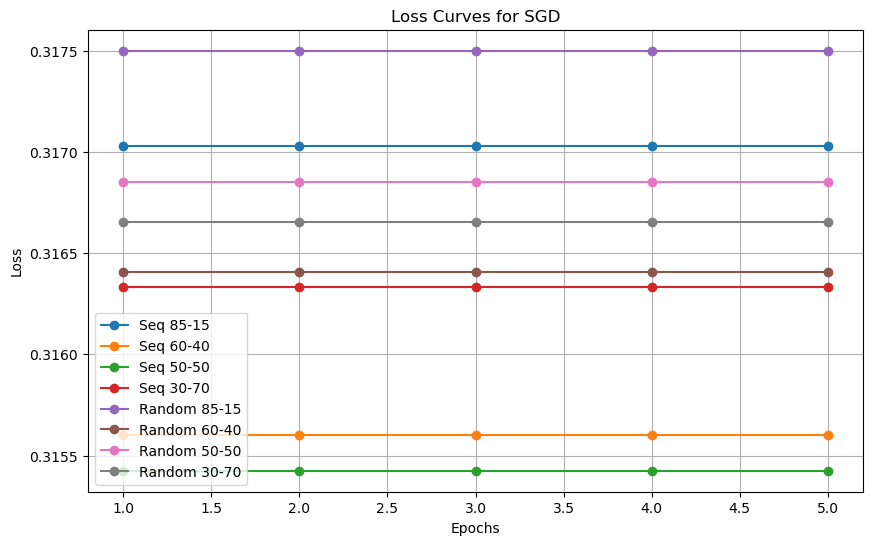

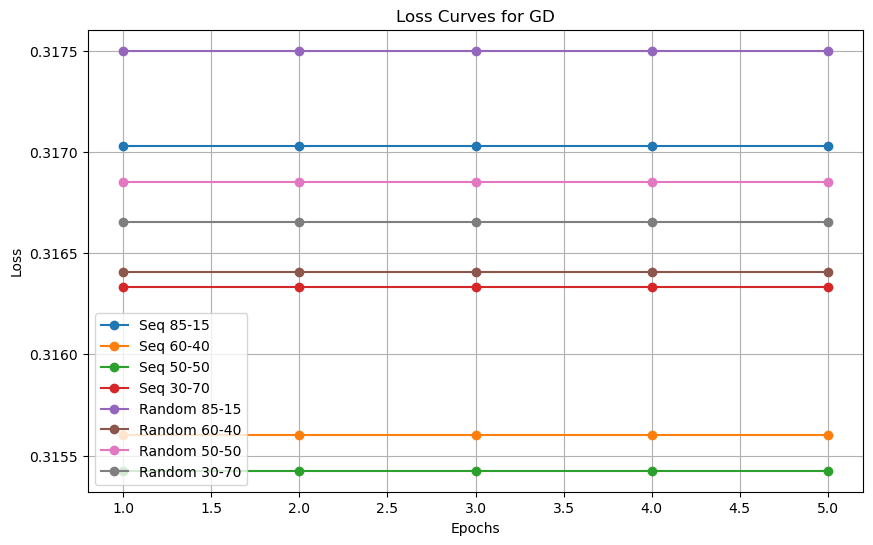

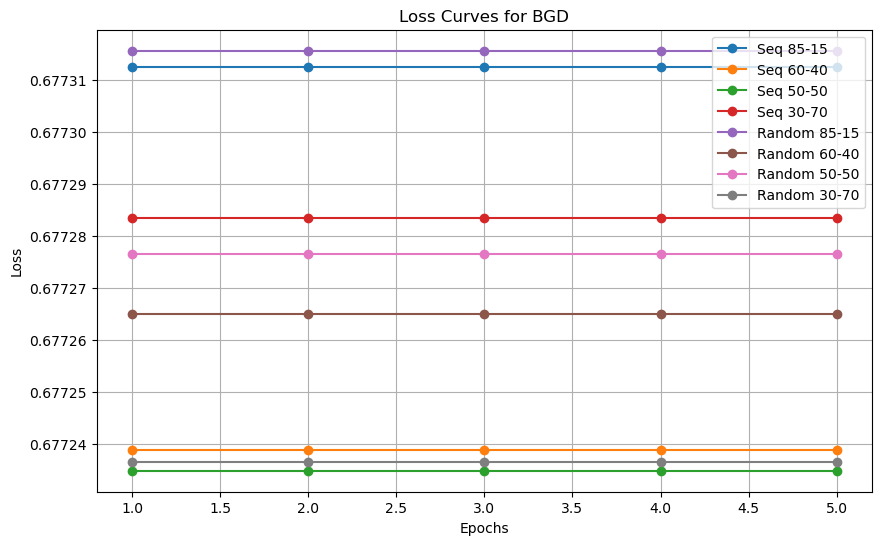

In [119]:
import matplotlib.pyplot as plt
import numpy as np

# Function to track loss during training
def track_loss_during_training(model, X_train, y_train, epochs):
    loss_history = []
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(len(X_train)):
            # Prediction using sigmoid
            linear_model = np.dot(X_train.iloc[i], model.weights) + model.bias

            y_pred = 1 / (1 + np.exp(-linear_model))
            
            # Loss calculation (Binary Cross-Entropy)
            loss = - (y_train.iloc[i] * np.log(y_pred) + (1 - y_train.iloc[i]) * np.log(1 - y_pred))
            epoch_loss += loss
        
        # Average loss for the epoch
        avg_loss = epoch_loss / len(X_train)
        loss_history.append(avg_loss)
    return loss_history

# Function to visualize loss curves
def visualize_loss_curves(loss_histories, models, splits):
    for model_name, history in loss_histories.items():
        plt.figure(figsize=(10, 6))
        for split_name, loss in history.items():
            plt.plot(range(1, len(loss) + 1), loss, marker='o', linestyle='-', label=split_name)
        
        plt.title(f"Loss Curves for {model_name}")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid(True)
        plt.show()

# Collecting loss histories
loss_histories = {}

for model_name, model_class in models.items():
    loss_histories[model_name] = {}
    print(f"\nEvaluating {model_name} on all splits...\n")
    
    for split_name, (X_train, X_test, y_train, y_test) in data_splits.items():
        model = model_class(learning_rate=0.005, epochs=5)
        model.fit(X_train, y_train)  # Original training code
        
        # Track loss without modifying the model
        loss_history = track_loss_during_training(model, X_train, y_train, epochs=5)
        loss_histories[model_name][split_name] = loss_history

# Visualize all loss curves
visualize_loss_curves(loss_histories, models, data_splits)

In [121]:
from sklearn.linear_model import LogisticRegression

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


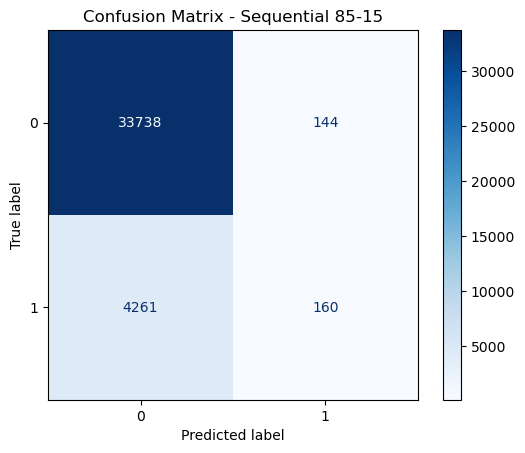

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


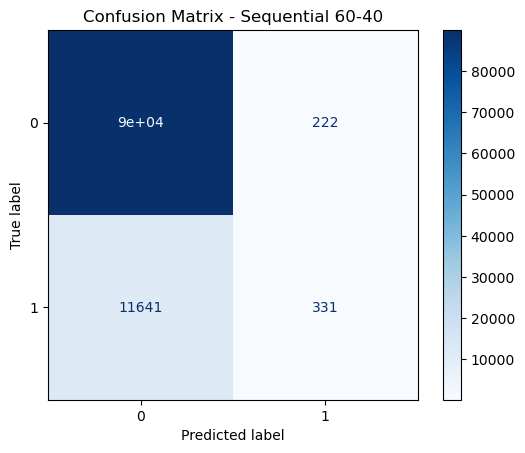

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


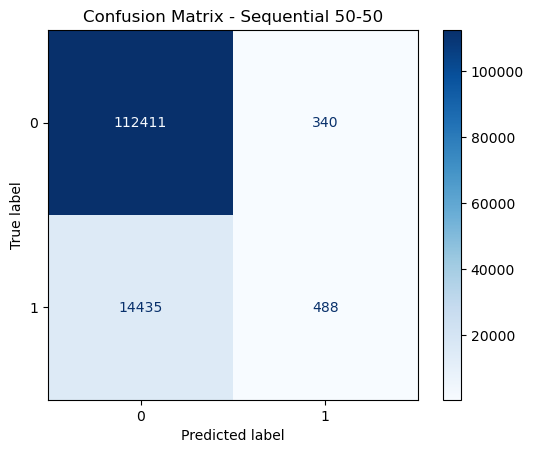

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


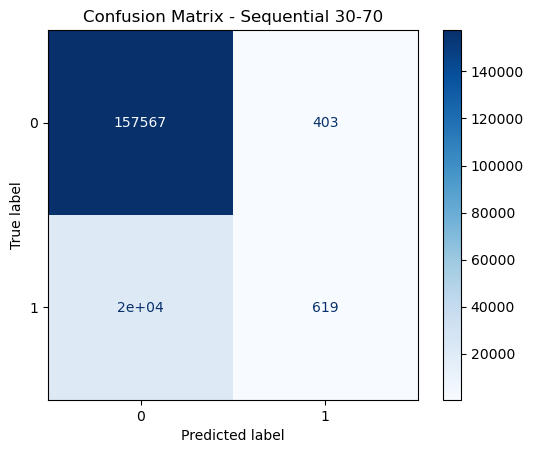

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


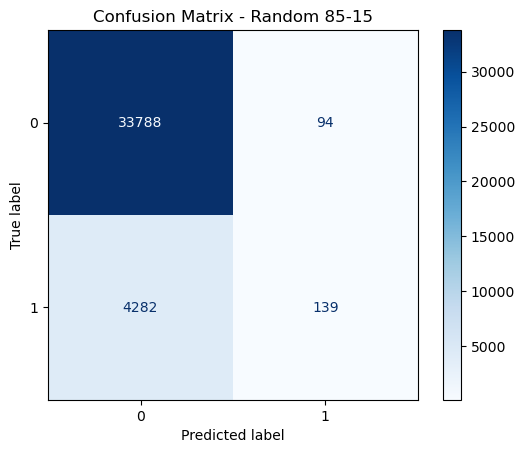

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


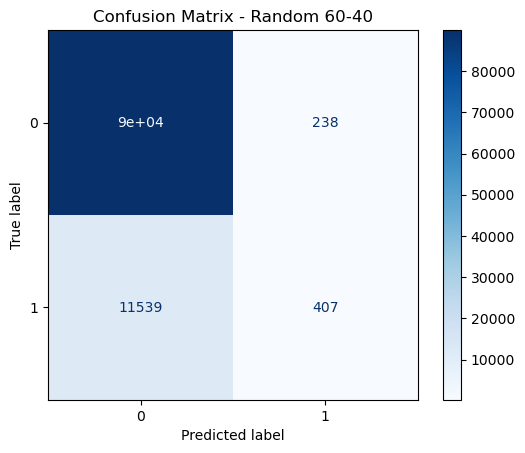

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


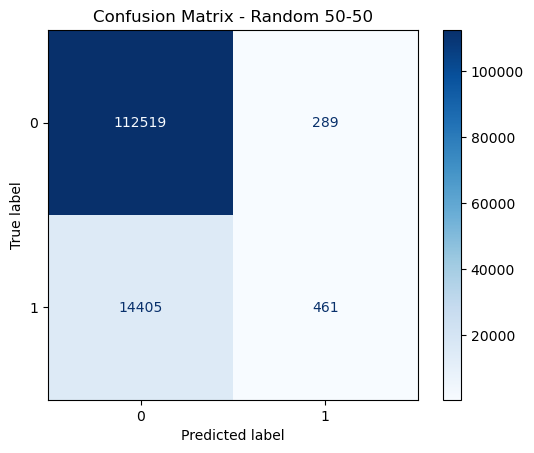

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


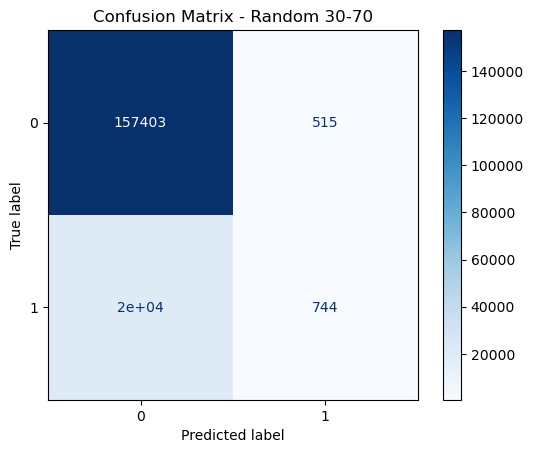

Split  Accuracy               Confusion Matrix
0  Sequential 85-15  0.884996    [[33738, 144], [4261, 160]]
1  Sequential 60-40  0.883854   [[89945, 222], [11641, 331]]
2  Sequential 50-50  0.884276  [[112411, 340], [14435, 488]]
3  Sequential 30-70  0.884991  [[157567, 403], [20154, 619]]
4      Random 85-15  0.885753     [[33788, 94], [4282, 139]]
5      Random 60-40  0.884696   [[89955, 238], [11539, 407]]
6      Random 50-50  0.884910  [[112519, 289], [14405, 461]]
7      Random 30-70  0.884773  [[157403, 515], [20081, 744]]

In [125]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

splits = {
    'Sequential 85-15': (0.85, False),
    'Sequential 60-40': (0.60, False),
    'Sequential 50-50': (0.50, False),
    'Sequential 30-70': (0.30, False),
    'Random 85-15': (0.85, True),
    'Random 60-40': (0.60, True),
    'Random 50-50': (0.50, True),
    'Random 30-70': (0.30, True)
}

results = []

for split_name, (train_size, shuffle) in splits.items():
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=train_size, shuffle=shuffle, random_state=42)
    
    # Initialize and fit the model
    model = LogisticRegression(solver='saga', max_iter=5, random_state=42)
    model.fit(X_train, y_train)

    # Predictions and Evaluation
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    results.append({
        'Split': split_name,
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix
    }) 

    # Plotting Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {split_name}')
    plt.show()

results_df = pd.DataFrame(results)

# Display the results
results_df

# **Final Report**
Prepare a LaTeX report comparing the performance of your custom Logistic Regression model with the inbuilt Logistic Regression function.

Include:
1.   Methodology description
2.   Performance metrics
1.   Visualizations
2.   Analysis of results
1.   Conclusions and insights gained




# **Submission Guidelines**
# Use LaTeX for the final report

*   Include all code implementations, visualizations, and result tables
*   Provide a thorough analysis of the performance differences between custom and inbuilt implementations
*   Create a report comparing the performance of a user-defined Logistic Regression model with the inbuilt Logistic Regression function
